In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [78]:
data = pd.read_json('loan_approval_dataset.json')

In [79]:
data.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
15976,15977,7133793,66,1,single,rented,yes,Technology_specialist,Satara,Maharashtra,1,10,0
76140,76141,340075,45,0,single,rented,no,Industrial_Engineer,Bulandshahr,Uttar_Pradesh,0,13,1
12336,12337,9464294,42,9,single,rented,no,Computer_hardware_engineer,Rewa,Madhya_Pradesh,5,10,1
79773,79774,4114112,67,10,single,rented,no,Chef,Morena,Madhya_Pradesh,10,13,0
182527,182528,1737928,28,8,single,rented,no,Civil_engineer,Suryapet,Telangana,8,10,0


In [80]:
data1=data[['Income','Age','Experience','Married/Single','House_Ownership','Car_Ownership','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']]

In [81]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   CURRENT_JOB_YRS    252000 non-null  int64 
 7   CURRENT_HOUSE_YRS  252000 non-null  int64 
 8   Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 19.2+ MB


In [82]:
data1.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [83]:
data1.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [84]:
data1.duplicated().sum()

208810

In [85]:
data1.nunique()

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

In [10]:
#sns.pairplot(data)

<Axes: ylabel='count'>

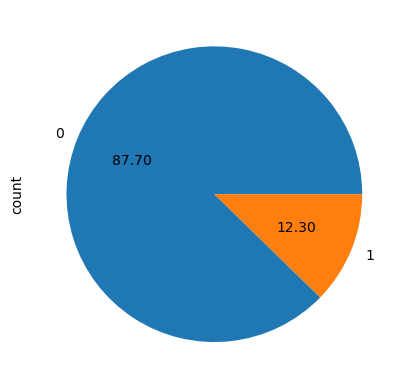

In [86]:
data1['Risk_Flag'].value_counts().plot(kind='pie',autopct='%.2f')

In [58]:
data1.sample(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
136731,2607103,33,8,single,rented,no,Army_officer,4,13,0
140646,5922261,43,6,single,rented,no,Microbiologist,6,14,1
48111,7995055,70,11,single,rented,yes,Design_Engineer,6,14,0
86121,5597223,74,8,single,rented,yes,Computer_operator,3,14,1
155556,1715663,54,16,single,rented,no,Police_officer,14,11,0


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,BaggingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [72]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
x_sample1,y_sample1=rus.fit_resample(data1.drop(['Risk_Flag'],axis=1),data1['Risk_Flag'])

(49486, 1)


<Axes: ylabel='count'>

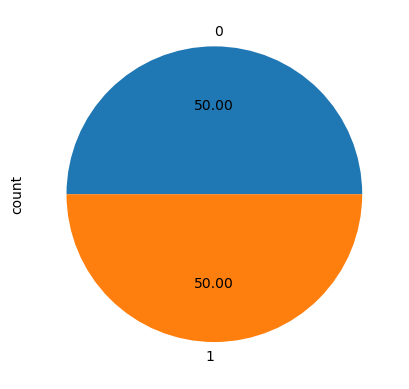

In [73]:
y1=pd.DataFrame(y_sample)
print(y1.shape)
y1['Risk_Flag'].value_counts().plot(kind='pie',autopct='%.2f')

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x_sample1,y_sample1,test_size=0.20,random_state=42)
x_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
53010,8442518,71,6,single,rented,yes,Petroleum_Engineer,6,11
38073,2065698,24,10,single,rented,yes,Mechanical_engineer,5,11
4422,7932088,41,20,married,rented,no,Technology_specialist,5,11
24797,6655846,66,11,single,rented,yes,Civil_engineer,11,14
47140,5924444,33,1,single,rented,no,Firefighter,1,12
...,...,...,...,...,...,...,...,...,...
54343,74741,59,14,single,rented,yes,Graphic_Designer,6,11
38158,5952371,67,16,single,rented,yes,Technician,3,14
860,988540,65,14,single,rented,no,Architect,13,11
15795,2386002,24,10,married,rented,yes,Petroleum_Engineer,6,12


In [63]:
trf1=ColumnTransformer([
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[3,4,5])
],remainder='passthrough')

In [64]:
x_train1=trf1.fit_transform(x_train)
x=pd.DataFrame(x_train1)
x

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8442518.0,71.0,6.0,6.0,11.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2065698.0,24.0,10.0,5.0,11.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,7932088.0,41.0,20.0,5.0,11.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6655846.0,66.0,11.0,11.0,14.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5924444.0,33.0,1.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49588,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74741.0,59.0,14.0,6.0,11.0
49589,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5952371.0,67.0,16.0,3.0,14.0
49590,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,988540.0,65.0,14.0,13.0,11.0
49591,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2386002.0,24.0,10.0,6.0,12.0


In [65]:
trf2=ColumnTransformer([
    ('scale',StandardScaler(),slice(0,9))
],remainder='passthrough')

In [66]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trf1,trf2)

In [67]:
x_train_s=pipe.fit_transform(x_train)
x_test_s=pipe.transform(x_test)
x1=pd.DataFrame(x_train_s)
x1

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.324361,-0.217953,0.27666,1.579378,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,-0.126656,-0.14272,1.195382,1.245576,-0.636150,-0.069448,-0.709898
1,0.324361,-0.217953,0.27666,1.579378,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,-0.126656,-0.14272,-1.008181,-1.486408,0.026698,-0.341154,-0.709898
2,-3.082980,-0.217953,0.27666,-0.633161,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,7.895389,-0.14272,1.018999,-0.498244,1.683818,-0.341154,-0.709898
3,0.324361,-0.217953,0.27666,1.579378,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,-0.126656,-0.14272,0.577983,0.954939,0.192410,1.289082,1.430456
4,0.324361,-0.217953,0.27666,-0.633161,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,-0.126656,-0.14272,0.325241,-0.963262,-1.464710,-1.427978,0.003553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49588,0.324361,-0.217953,0.27666,1.579378,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,-0.126656,-0.14272,-1.696173,0.548048,0.689546,-0.069448,-0.709898
49589,0.324361,-0.217953,0.27666,1.579378,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,7.125112,-0.126656,-0.14272,0.334891,1.013066,1.020970,-0.884566,1.430456
49590,0.324361,-0.217953,0.27666,-0.633161,-0.138923,7.140327,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,-0.126656,-0.14272,-1.380402,0.896812,0.689546,1.832494,-0.709898
49591,-3.082980,-0.217953,0.27666,1.579378,-0.138923,-0.140050,-0.14614,-0.1399,-0.141242,-0.145129,...,-0.14433,-0.146283,-0.140349,-0.126656,-0.14272,-0.897497,-1.486408,0.026698,-0.069448,0.003553


In [68]:
tree=DecisionTreeClassifier(criterion='gini',max_depth= 25,max_leaf_nodes= None,splitter= 'best')
rf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
gb=GradientBoostingClassifier()
lr=LogisticRegression()
na=GaussianNB()


In [21]:
# param={
#     'tree':DecisionTreeClassifier(),
#     'rf':RandomForestClassifier(),
#     'gb':GradientBoostingClassifier(),
#     'lr':LogisticRegression(),
#     'naive':GaussianNB(),
#     'svm':SVC()
# }
# grid_tree={
#     'criterion':['gini','entropy'],
#     'splitter':['best','random'],
#     'max_depth':[20,25,30,35,40,45,50,60,70,10,None],
#     'max_leaf_nodes':[20,25,21,23,22,24,26,30,35,None]
# }

In [22]:
# gsv=GridSearchCV(estimator=tree,param_grid=grid_tree,cv=5,scoring='accuracy',n_jobs=-1)

Accuracy  0.7957093313976934
Classification               precision    recall  f1-score   support

           0       0.81      0.77      0.79      6148
           1       0.78      0.82      0.80      6251

    accuracy                           0.80     12399
   macro avg       0.80      0.80      0.80     12399
weighted avg       0.80      0.80      0.80     12399



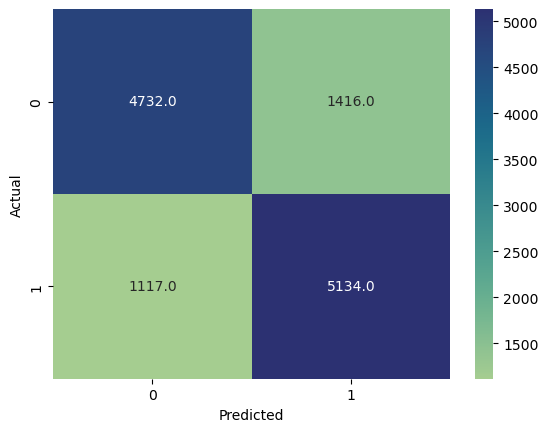

In [69]:
tree.fit(x_train_s,y_train)
y_pred=tree.predict(x_test_s)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='crest',fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy ',accuracy_score(y_test,y_pred))
print('Classification',classification_report(y_test,y_pred))

Accuracy  0.848052262279216
Classification               precision    recall  f1-score   support

           0       0.82      0.88      0.85      6148
           1       0.88      0.81      0.84      6251

    accuracy                           0.85     12399
   macro avg       0.85      0.85      0.85     12399
weighted avg       0.85      0.85      0.85     12399



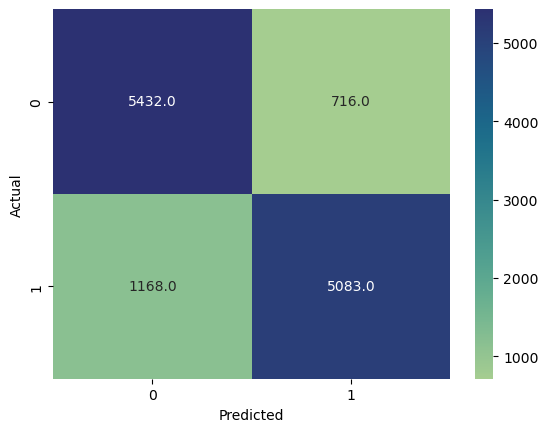

In [76]:
#Random forest
rf.fit(x_train_s,y_train)
y_pred_rf=rf.predict(x_test_s)

sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,cmap='crest',fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy ',accuracy_score(y_test,y_pred_rf))
print('Classification',classification_report(y_test,y_pred_rf))

Accuracy  0.5994838293410759
Classification               precision    recall  f1-score   support

           0       0.59      0.61      0.60      6148
           1       0.61      0.59      0.60      6251

    accuracy                           0.60     12399
   macro avg       0.60      0.60      0.60     12399
weighted avg       0.60      0.60      0.60     12399



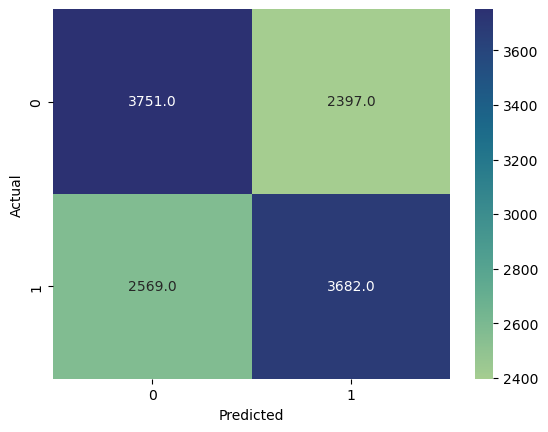

In [71]:
gb.fit(x_train_s,y_train)
y_pred_gb=gb.predict(x_test_s)

sns.heatmap(confusion_matrix(y_test,y_pred_gb),annot=True,cmap='crest',fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy ',accuracy_score(y_test,y_pred_gb))
print('Classification',classification_report(y_test,y_pred_gb))

Accuracy  0.524881038793451
Classification               precision    recall  f1-score   support

           0       0.56      0.19      0.28      6148
           1       0.52      0.86      0.65      6251

    accuracy                           0.52     12399
   macro avg       0.54      0.52      0.46     12399
weighted avg       0.54      0.52      0.46     12399



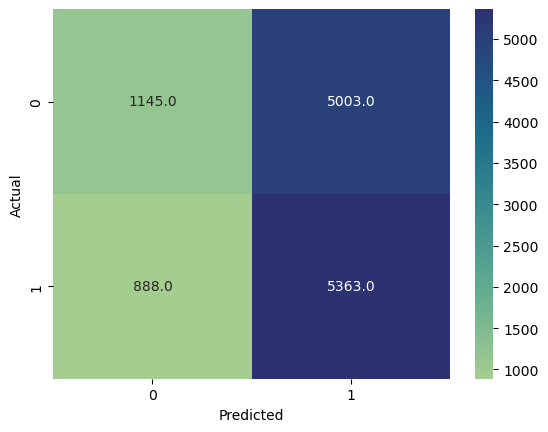

In [55]:
na.fit(x_train_s,y_train)
y_pred_sv=na.predict(x_test_s)

sns.heatmap(confusion_matrix(y_test,y_pred_sv),annot=True,cmap='crest',fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy ',accuracy_score(y_test,y_pred_sv))
print('Classification',classification_report(y_test,y_pred_sv))

Accuracy  0.533914025324623
Classification               precision    recall  f1-score   support

           0       0.53      0.53      0.53      6148
           1       0.54      0.54      0.54      6251

    accuracy                           0.53     12399
   macro avg       0.53      0.53      0.53     12399
weighted avg       0.53      0.53      0.53     12399



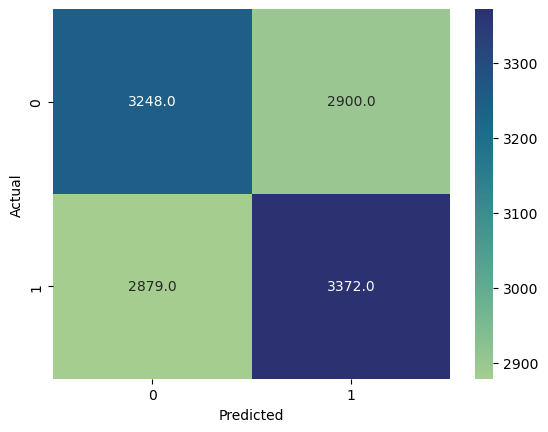

In [74]:
lr.fit(x_train_s,y_train)
y_pred_lr=lr.predict(x_test_s)

sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,cmap='crest',fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print('Accuracy ',accuracy_score(y_test,y_pred_lr))
print('Classification',classification_report(y_test,y_pred_lr))